# Data set de modas 
implementado con ayuda de Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


Los datos de Fashion MNIST estan disponibles directamente en la API de conjuntos de datos de `tf.keras`
Y se cargan de la siguiente manera

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

Llamar a `load_data`
En este objeto nos dara dos conjuntos con los valores de entrenamiento y prueba para los graficos que contienen las prendas y sus etiquetas

In [4]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 4s 1us/step


Visualizacion de los valores
Se imprime una imagen de entrenamiento y una etiqueta de entrenamiento para ver

Label:  0
Matrix:  [[  0   0   0   0   0   0   0   0   0   0 120  54   0   0   0   0  13 124   0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0  64 173 207 218 206 232 184 168 202 205 218 202 126  12   0   0   1   0   0   0   0]
 [  0   0   0   0   0  56 199 223 222 207 205 211 223 227 231 230 214 203 209 220 213 164   0   0   2   0   0   0]
 [  0   0   0   0   0 191 219 200 200 206 206 205 206 206 203 202 201 202 201 195 198 222 149   0   0   0   0   0]
 [  0   0   0   0  72 224 201 205 208 202 204 204 205 205 208 205 192 188 203 202 200 189 198  23   0   0   0   0]
 [  0   0   0   0 160 221 211 200 204 203 204 203 201 202 201 203 201 185 203 203 188 194 207 126   0   0   0   0]
 [  0   0   0   0 227 212 224 205 201 204 203 202 202 201 201 200 201 195 198 191 182 199 202 202   0   0   0   0]
 [  0   0   0  20 208 205 224 219 201 200 202 202 201 201 199 198 199 199 197 183 195 210 191 189  11   0   0   0]
 [  0   0   0 138 223 201 218 229 216 202 202 200 200 197 197

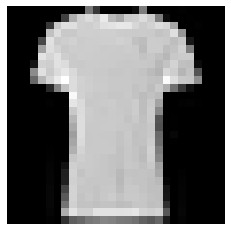

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth = 200)

# Establecer el indice de la imagen que se visualizara
img_index = 5999 #6000 -1

# Visualizacion
plt.imshow(training_images[img_index], cmap = 'gray')
plt.axis(False)

print('Label: ', training_labels[img_index])
print('Matrix: ', training_images[img_index])

# Preparacion de los datos
todos los valores se encuentran en un rango de 0 - 255. Se esta entrenando una red neuronal, por varias razones es mas facil si tranformamos los valores para tratar con valores entre 0 y 1. Este proceso es llamado `Normalizacion`

In [7]:
# Actualizamos la variable dividiendo los valores originales entre 255
training_images = training_images/ 255.0
test_images = test_images / 255.0

Label:  0
Matrix:  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.84544406e-03 8.30449827e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.99923106e-04 1.90695886e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.07574010e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.84236832e-04 2.66051519e-03 3.18339100e-03 3.35255671e-03 3.16801230e-03 3.56785852e-03
  2.82968089e-03 2.58362168e-03 3.10649750e-03 3.15263360e-03 3.35255671e-03 3.10649750e-03 1.93771626e-03 1.84544406e-04 0.00000000e+00 0.00000000e+00 1.53787005e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.61207228e-04 3.06036140e-03 3.42945021e-03 3.414

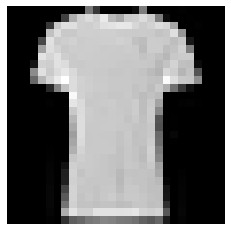

In [8]:
# Verificamos si esta cargando los valores de forma correcta
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)

img_index = 5999

plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label: ', training_labels[img_index])
print('Matrix: ', training_images[img_index])

In [9]:
training_images[5999].shape

(28, 28)

### Creacion del Modelo

In [ ]:
mlp_model = tf.keras.models.Sequential([])